# 利用大頭貼辨識身高

## 組員

105208036 經濟四 顏廷  
105208077 經濟四 涂育賢  
104102002 教育四 李欣穎

## 實作思路

1. 透過爬蟲取得超過一萬張**個人大頭照**及**身高資訊**
2. 利用**CNN**、**fastAI**、**OpenCV**模型進行預測，分別進行：  
    2.1 臉部特徵擷取，透過臉部特徵數據預測相對應的身高並與真實數據做對比  
    2.2 直接透過照片去預測身高
3. 篩選模型、調整參數
4. 預測結果

## 範例

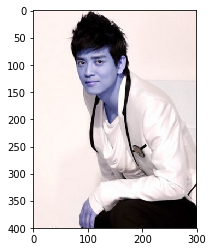

In [3]:
import matplotlib.pyplot as plt
import cv2
pic1 = cv2.imread('0.png')
plt.imshow(pic1)

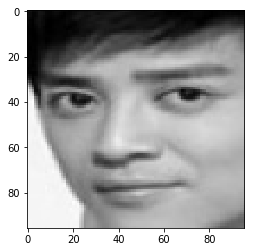

In [4]:
pic2 = cv2.imread('0.jpeg')
plt.imshow(pic2)

#### 後續將丟入模型進行臉部特徵偵測或直接預測身高

## 以下為完成的部分

備註：模型訓練是在GCP上跑的

## 爬蟲部分

以下是由 **李欣穎** 組員負責的爬蟲程式碼  
目標網站：https://celebsheight.org

In [ ]:
# import package
import requests
import re
import csv
from bs4 import BeautifulSoup
import requests.packages.urllib3
requests.packages.urllib3.disable_warnings()
import urllib.request
import os
import time
from tqdm import tqdm
import pandas as pd

# code
header = {"User_Agent":"組員電腦的"}
letter_list = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j",
               "k", "l", "m", "n", "o", "p", "q", "r", "s", "t",
               "u", "v", "w", "x", "y", "z"]

img_list = []
height_list = []
web_list = []
name_list = []

for i in letter_list:
    for num in range(1,37):
        web = f"https://celebsheight.org/celebrities-starting-with-{i}-heights?page={num}"
        page = requests.get(web, headers = header)
        soup =  BeautifulSoup(page.content, "html.parser")
        img_links = soup.find_all("img", {"src": re.compile('.*?\.jpg')})
        for link in img_links:
            img_list.append(link["src"])
for i in letter_list:
    for num in range(1,37):
        web= f"https://celebsheight.org/celebrities-starting-with-{i}-heights?page={num}"
        web_list.append(web)
for web in web_list:
    page1 = requests.get(web, headers = headers)
    soup1 =  BeautifulSoup(page1.content, "html.parser")
    height = soup1.find_all("div", class_ = "celeb-grid-item-n")
    each_height = []
    each_name =[]
    for i in height:
        each_height.append(i.find("h2").text)
        each_name.append(i.find("h1").text)
    height_list.append(each_height)
    name_list.append(each_name)
    
height_lists = []
name_lists = []

for i in range(len(height_list)):
    for a in range(len(height_list[i])):
        height_split = height_list[i][a]
        name_height = height_split.split(" ")
        height = name_height[-2]
        height_lists.append(height)
for i in range(len(name_list)):
    for a in range(len(name_list[i])):
        name = name_list[i][a]
        name_lists.append(name)

folder_path ="組員的電腦路徑"
if os.path.exists(folder_path) == False:
    os.makedirs(folder_path)

for index, item in enumerate(img_list):
    if item:
        try:
            html = requests.get(item, verify = False)
            img_name = folder_path + height_lists[index] + "-" + name_lists[index] + '.png'
            with open(img_name, 'wb') as file:
                file.write(html.content)
                file.flush()
            file.close()
            time.sleep(1)
        except:
            pass

以下是由 **涂育賢** 組員 負責的爬蟲程式碼  
目標網站：http://www.7k7k.net.cn/star/

In [ ]:
# import package

import urllib.request
from bs4 import BeautifulSoup
import os
import time
from tqdm import tqdm
import re
import pandas as pd

folder_path = '組員的電腦路徑'
if os.path.exists(folder_path) == False:
    os.makedirs(folder_path)


def crawl_page(url):
    mainUrl = 'http://www.7k7k.net.cn/star/'
    targetUrl = mainUrl + url
    headers = {
        'User-Agent': '組員電腦的'}
    web = requests.get(targetUrl, headers=headers)
    return web.content


def crawl_all(n):
    page_lst = []
    for i in range(1, n):
        if i == 1:
            nPage = 'index.html'
            page_lst.append(nPage)
        else:
            nPage = 'index_%d.html' % (i)
            page_lst.append(nPage)

    pageNum = 0
    index_lst = []
    name_lst = []
    info_lst = []
    for url in tqdm(page_lst):
        web = crawl_page(url)
        soup = BeautifulSoup(web, 'html.parser')
        items = soup.find_all('img')
        items = items[1:]
        if pageNum % 10 == 0:
            time.sleep(5)
        for index, item in enumerate(items):
            if item:
                try:
                    html = requests.get(item.get('src'))
                    img_name = folder_path + str(index + 25*pageNum) + '.png'
                    with open(img_name, 'wb') as file:
                        file.write(html.content)
                        file.flush()
                    file.close()
                    print('第%d張圖片下載完成' % (index + 25*pageNum))
                    time.sleep(1)
                except:
                    pass

        names = soup.find_all('a')
        names = names[20:70]
        for index, name in enumerate(names):
            if name:
                html = requests.get(
                    'http://www.7k7k.net.cn' + name.get('href'))
                html.encoding = 'html'
                pattern_name = re.compile('itemprop="name">(.*?)<\/b>')
                pattern_info = re.compile(
                    'class="w200"><span>身　　高：<\/span>(.*?)CM<\/p>\s+<p.*?><span>体　　重：<\/span>(.*?)KG<\/p>')
                popName = re.findall(pattern_name, html.text)
                popInfo = re.findall(pattern_info, html.text)
                index_lst.append(index + 25*pageNum)
                name_lst.append(popName[0])
                if len(popInfo) == 0:
                    info_lst.append('NA')
                else:
                    info_lst.append(popInfo[0])
        pageNum += 1

    return index_lst, name_lst, info_lst


index_lst, name_lst, info_lst = crawl_all(143)


Index_lst = index_lst[:3550]
Name_lst = []
for i in range(0, len(name_lst), 2):
    Name_lst.append(name_lst[i])
Info_lst = []
for i in range(0, len(info_lst), 2):
    Info_lst.append(info_lst[i])

data = {'index': [item for item in Index_lst],
        'name': [item for item in Name_lst],
        'height': [item[0] for item in Info_lst],
        'weight': [item[1] for item in Info_lst]}
data = pd.DataFrame(data)

outputpath = '組員的電腦路徑'
data.to_csv(outputpath, index=False, header=True)

## 第一階段訓練

想藉 **Kaggle facial keypoint detection** 資料集與高手提供的模型參數來作為我們標註人臉特徵的方式。  
參考網址：https://www.kaggle.com/karanjakhar/facial-keypoint-detection/output

#### 第一步將圖片裁切至臉部大小
使用 **haarcascade_frontalface_default.xml**

In [ ]:
import cv2
import numpy as np
import os


def dataset():
    images = []
    labels = []
    labels_dic = {}
    people = [person for person in os.listdir(
        '組員電腦路徑')]
    people.sort(key=lambda x: int(x[:-4]))
    for i, person in enumerate(people):
        labels_dic[i] = person
        images.append(
            [person[:-4], cv2.imread("組員電腦路徑" + person, 0)])
        labels.append(person)

    return (images, np.array(labels), labels_dic)


images, labels, labels_dic = dataset()


class FaceDetector(object):
    def __init__(self, xml_path):
        self.classifier = cv2.CascadeClassifier(xml_path)

    def detect(self, image, biggest_only=True):
        scale_factor = 1.2
        min_neighbors = 5
        min_size = (30, 30)
        biggest_only = True
        faces_coord = self.classifier.detectMultiScale(image,
                                                       scaleFactor=scale_factor,
                                                       minNeighbors=min_neighbors,
                                                       minSize=min_size,
                                                       flags=cv2.CASCADE_SCALE_IMAGE)
        return faces_coord


def cut_faces(image, faces_coord):
    faces = []

    for (x, y, w, h) in faces_coord:
        w_rm = int(0.3 * w / 2)
        faces.append(image[y: y + h, x + w_rm: x + w - w_rm])

    return faces


def resize(images, size=(96, 96)):
    images_norm = []
    for image in images:
        if image.shape < size:
            image_norm = cv2.resize(image, size,
                                    interpolation=cv2.INTER_AREA)
        else:
            image_norm = cv2.resize(image, size,
                                    interpolation=cv2.INTER_CUBIC)
        images_norm.append(image_norm)

    return images_norm


def normalize_faces(image, faces_coord):

    faces = cut_faces(image, faces_coord)
    faces = resize(faces)

    return faces


for image in images:
    detector = FaceDetector(
        "組員電腦路徑/haarcascade_frontalface_default.xml")
    faces_coord = detector.detect(image[1], True)
    faces = normalize_faces(image[1], faces_coord)
    for i, face in enumerate(faces):
        cv2.imwrite('%s.jpeg' % (image[0]), faces[i])


#### 第二步自行以kaggle資料集訓練臉部特徵辨識模型

In [ ]:
from keras.layers import Conv2D, Dropout, Dense, Flatten
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D, MaxPool2D, ZeroPadding2D
from keras.models import Sequential, Model
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os

Train_Dir = '電腦路徑/training.csv'
Test_Dir = '電腦路徑/test.csv'
lookid_dir = '電腦路徑/IdLookupTable.csv'
train_data = pd.read_csv(Train_Dir)
test_data = pd.read_csv(Test_Dir)
lookid_data = pd.read_csv(lookid_dir)


train_data.head().T

train_data.isnull().any().value_counts()
train_data.fillna(method='ffill', inplace=True)
# train_data.reset_index(drop = True,inplace = True)

train_data.isnull().any().value_counts()
imag = []
for i in range(0, 7049):
    img = train_data['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imag.append(img)

image_list = np.array(imag, dtype='float')
X_train = image_list.reshape(-1, 96, 96, 1)

plt.imshow(X_train[0].reshape(96, 96), cmap='gray')
plt.show()

training = train_data.drop('Image', axis=1)

y_train = []
for i in range(0, 7049):
    y = training.iloc[i, :]
    y_train.append(y)
y_train = np.array(y_train, dtype='float')


model = Sequential([Flatten(input_shape=(96, 96)),
                         Dense(128, activation="relu"),
                         Dropout(0.1),
                         Dense(64, activation="relu"),
                         Dense(30)
                         ])


model = Sequential()

model.add(Convolution2D(32, (3, 3), padding='same',
          use_bias=False, input_shape=(96, 96, 1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3, 3), padding='same', use_bias=False))
# model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3, 3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()


model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae']

model.fit(X_train, y_train, epochs=50, batch_size=256, validation_split=0.2)

#### 第三步儲存模型並載入來預測我們的照片

In [ ]:
model_json = model.to_json()
open('face_feature_detection.json','w').write(model_json)
model.save_weights('face_feature_detection_weights.h5')

# 未完待續...